<a href="https://colab.research.google.com/github/Vigneshthanga/258-Deep-Learning/blob/master/Assignment-3/amazon_planet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code for Downloading Amazon dataset from Kaggle

In [0]:
#kaggle datasets download -d nikitarom/planets-dataset
#unzip planets-dataset.zip

In [0]:
#ls /content/gdrive/My\ Drive/258-DeepLearning/Data

##Mounting google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#ls /content/gdrive/My\ Drive/258-DeepLearning/Data/planet/planet/train-jpg

In [0]:
#ls '/content/gdrive/My Drive/258-DeepLearning/Data/planet/planet/train-jpg'

## Root directory for data access

In [0]:
datapath = '/content/gdrive/My Drive/258-DeepLearning/Data/planet/planet/'

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from matplotlib import pyplot as plt

2.2.0-rc4


## Appending the .jpg extension to all the rows of 'image_name' column

In [0]:
def append_ext(fn):
    return fn+".jpg"

## Loading the train csv into dataframe

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
train_df = pd.read_csv(datapath+'train_classes.csv',dtype=str)
train_df["image_name"]=train_df["image_name"].apply(append_ext)

In [0]:
train_df.head(4)

,image_name,tags
0,train_0.jpg,haze primary
1,train_1.jpg,agriculture clear primary water
2,train_2.jpg,clear primary
3,train_3.jpg,clear primary


In [0]:
train_df.dtypes

image_name    object
tags          object
dtype: object

## Getting object of ImageDataGenerator from Keras. Train split 80% and Validation split - 20%

In [0]:
datagen = ImageDataGenerator(shear_range=0.2, vertical_flip=True, zoom_range=1.05, fill_mode="wrap", rescale=1./255.,validation_split=0.2)

## Using the same object for both train and validation data because, 18000 images are found in train and labels of test data (9000 images) are not available. So, the train data is used for training and validation cycle.

In [0]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory='/content/gdrive/My Drive/258-DeepLearning/Data/planet/planet/train-jpg',
x_col="image_name",
y_col="tags",
subset="training",
batch_size=1000,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 32384 validated image filenames belonging to 449 classes.


In [0]:
valid_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory='/content/gdrive/My Drive/258-DeepLearning/Data/planet/planet/train-jpg',
x_col="image_name",
y_col="tags",
subset="validation",
batch_size=1000,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 8095 validated image filenames belonging to 449 classes.


## We can see the description of class ID in this dictionary

In [0]:
train_generator.class_indices

{'agriculture artisinal_mine bare_ground clear primary road': 0,
 'agriculture artisinal_mine bare_ground clear primary road water': 1,
 'agriculture artisinal_mine clear conventional_mine cultivation habitation primary road water': 2,
 'agriculture artisinal_mine clear cultivation habitation primary road water': 3,
 'agriculture artisinal_mine clear cultivation habitation primary water': 4,
 'agriculture artisinal_mine clear cultivation primary': 5,
 'agriculture artisinal_mine clear cultivation primary road water': 6,
 'agriculture artisinal_mine clear cultivation primary water': 7,
 'agriculture artisinal_mine clear habitation primary road water': 8,
 'agriculture artisinal_mine clear habitation road water': 9,
 'agriculture artisinal_mine clear primary': 10,
 'agriculture artisinal_mine clear primary road': 11,
 'agriculture artisinal_mine clear primary road water': 12,
 'agriculture artisinal_mine clear primary selective_logging water': 13,
 'agriculture artisinal_mine clear prima

## Visualizing the dataset

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.axis('off')

(1000, 32, 32, 3)


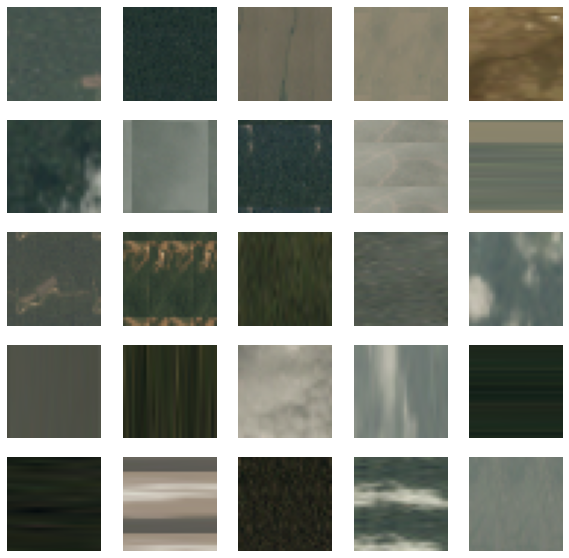

In [0]:
image_batch, label_batch = next(train_generator)
print(image_batch.shape)
show_batch(image_batch, label_batch)

## A simple CNN model for classifying the given image as either of thos 449 classes

In [0]:
from tensorflow.keras.layers import * 
def createModel():
  model = tf.keras.Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(449, activation='softmax'))
  return model


## Tried Tensor Board for train and validation accuracy visualization. But due to large amount of logs, each epoch take approximately 2 hours to complete. So, this is not used for this task.

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [0]:
import tensorflow as tf
import datetime, os

## We can visualize the model parameters and it's shape using model.summary()

In [0]:
model = createModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

## Defined train_model function which accomodate the model.fit() function. Note we can use fit() for generators also as, fit_Generator() will be deprecated in future releases

In [0]:
from datetime import datetime
def train_model():
  model = createModel()
  model.compile(tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
#  logdir = "/content/gdrive/My Drive/258-DeepLearning/Data/planet/logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
#  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  early_stop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto',
                baseline=None, restore_best_weights=False)

  STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
  STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
  
  model.fit(x=train_generator,
                      steps_per_epoch=STEP_SIZE_TRAIN,
                      validation_data=valid_generator,
                      validation_steps=STEP_SIZE_VALID,
                      epochs=20, callbacks=[early_stop])
  tf.keras.models.save_model(model, '/content/gdrive/My Drive/258-DeepLearning/amazon_model_1', overwrite=True, include_optimizer=True, save_format='tf',
                            signatures=None, options=None)

## We can un comment this line to retrain the model from the begining. But, since the trained model is saved, we have commented this line.

In [0]:
#train_model()

Epoch 1/20
32/32 [==============================] - 9350s 292s/step - loss: 5.1878 - accuracy: 0.3071 - val_loss: 4.2840 - val_accuracy: 0.1521
Epoch 2/20
32/32 [==============================] - 204s 6s/step - loss: 3.7460 - accuracy: 0.3001 - val_loss: 3.5719 - val_accuracy: 0.3381
Epoch 3/20
32/32 [==============================] - 204s 6s/step - loss: 3.2521 - accuracy: 0.3461 - val_loss: 3.0598 - val_accuracy: 0.3826
Epoch 4/20
32/32 [==============================] - 202s 6s/step - loss: 2.9054 - accuracy: 0.3875 - val_loss: 2.9389 - val_accuracy: 0.3906
Epoch 5/20
32/32 [==============================] - 202s 6s/step - loss: 2.8177 - accuracy: 0.3952 - val_loss: 2.8444 - val_accuracy: 0.4014
Epoch 6/20
32/32 [==============================] - 201s 6s/step - loss: 2.7935 - accuracy: 0.3930 - val_loss: 2.8242 - val_accuracy: 0.4020
Epoch 7/20
32/32 [==============================] - 202s 6s/step - loss: 2.7317 - accuracy: 0.4042 - val_loss: 2.7640 - val_accuracy: 0.4103
Epoch 8/20

## Loading the saved model using keras.models.load_model() function

In [0]:
loaded_model = tf.keras.models.load_model('/content/gdrive/My Drive/258-DeepLearning/amazon_model_1')

In [0]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

## Loading a test image from test-jpg directory to classify the email to either of those 449 classes

In [0]:
import cv2
import tensorflow as tf
import numpy as np

def prepare(filepath):
  imgsize = 32
  img_array = cv2.imread(filepath)
  arr = cv2.resize(img_array, (imgsize, imgsize))
  return arr.reshape(1, imgsize, imgsize, 3)

In [0]:
filepath = '/content/gdrive/My Drive/258-DeepLearning/Data/planet/planet/test-jpg/test_1.jpg'
img = prepare(filepath)

## Ensure that the shape of test data is same as that of train data. Else we cannot pass that data to the model.

In [0]:
img.shape

(1, 32, 32, 3)

## Get the y_pred matrix from the model

In [0]:
y_pred = loaded_model.predict([img])

## Apply argmax function on it to get the class ID.

In [0]:
np.argmax(y_pred)

366

## Evaluate the loaded_model against the validation set and compare that with the last step in training cycle. The result should be somewhat similar.

In [0]:
score = loaded_model.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)

NameError: ignored

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y_pred = model.predict_generator(valid_generator, steps=(valid_generator.n // valid_generator.batch_size)+1)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
print(classification_report(valid_generator.classes, y_pred, target_names=classes))